In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm

def walkdir(root):
    filepathes = []
    for r, _, fs in os.walk(root):
        for f in (fs):
            filepathes.append(os.path.join(r, f))
    return filepathes 

reportdir = os.path.join("forreport")
if not os.path.exists(reportdir):
    os.mkdir(reportdir)

In [7]:
methodmap = {
    'HistEQ':[
        ("origin","origin"),
        ("HistEQ_RGB", "HistEQ on RGB"),
        ("HistEQ_I","HistEQ on I of HSI"),
        ("HistEQ_Lab","HistEQ on L* of L*a*b*")
    ],
    
    'sharpening':[
        ("origin","origin"),
        ("RGBsharpening","sharpening on RGB"),
        ("HistEQ_I","HistEQ on I of HSI"),
        ("HistEQ_N_sharp","sharpening on RGB & HistEQ on I of HSI")
    ],

    'Gamma':[
        ("origin","origin"), 
        ("Gamma","Gamma correction on S of HSI"),
        ("HistEQ_I","HistEQ on I of HSI"),
        ("HistEQ_I_Ga","HistEQ on I and Gamma on S of HSI")
    ]
}

allmethods = {}
for method, submethod in methodmap.items():
    allmethods[method] = {}
    for folder,s in submethod:
        #print(s)
        allims = walkdir(os.path.join("result",folder))
        for pi in allims:
            name = os.path.split(pi)[1]
            if name not in allmethods[method]:
                allmethods[method][name] = []
            #print([s, pi])
            allmethods[method][name].append([s, pi])
with open(os.path.join(reportdir, "displayorder.json"),"w+") as j:
    json.dump(allmethods, j, indent=4, ensure_ascii=False)

In [8]:
for method, result in tqdm(allmethods.items()):
    
    methodsavedir = os.path.join(reportdir,method)
    if not os.path.exists(methodsavedir):
        os.mkdir(methodsavedir)

    for name, imgs in result.items():
 
        fig = plt.figure(dpi=500, edgecolor='black', linewidth=1)
        smethod = len(imgs)
        row = smethod//2 if smethod%2 == 0 else (smethod//2)+1
        for i, img in enumerate(imgs):
            ax = plt.subplot(row, 2, i+1)
            ax.set_title(img[0], fontsize=9)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(
                cv2.cvtColor(cv2.imread(img[1]), cv2.COLOR_BGR2RGB)
            )
        plt.tight_layout() 
        plt.subplots_adjust(
            left=0.01,bottom=0.0,top=0.9,right=0.95,
        )
        plt.suptitle(name)
        plt.savefig(
            os.path.join(methodsavedir,name),
            bbox_inches="tight",pad_inches=0.1
        )
        plt.close()



100%|██████████| 3/3 [00:07<00:00,  2.38s/it]


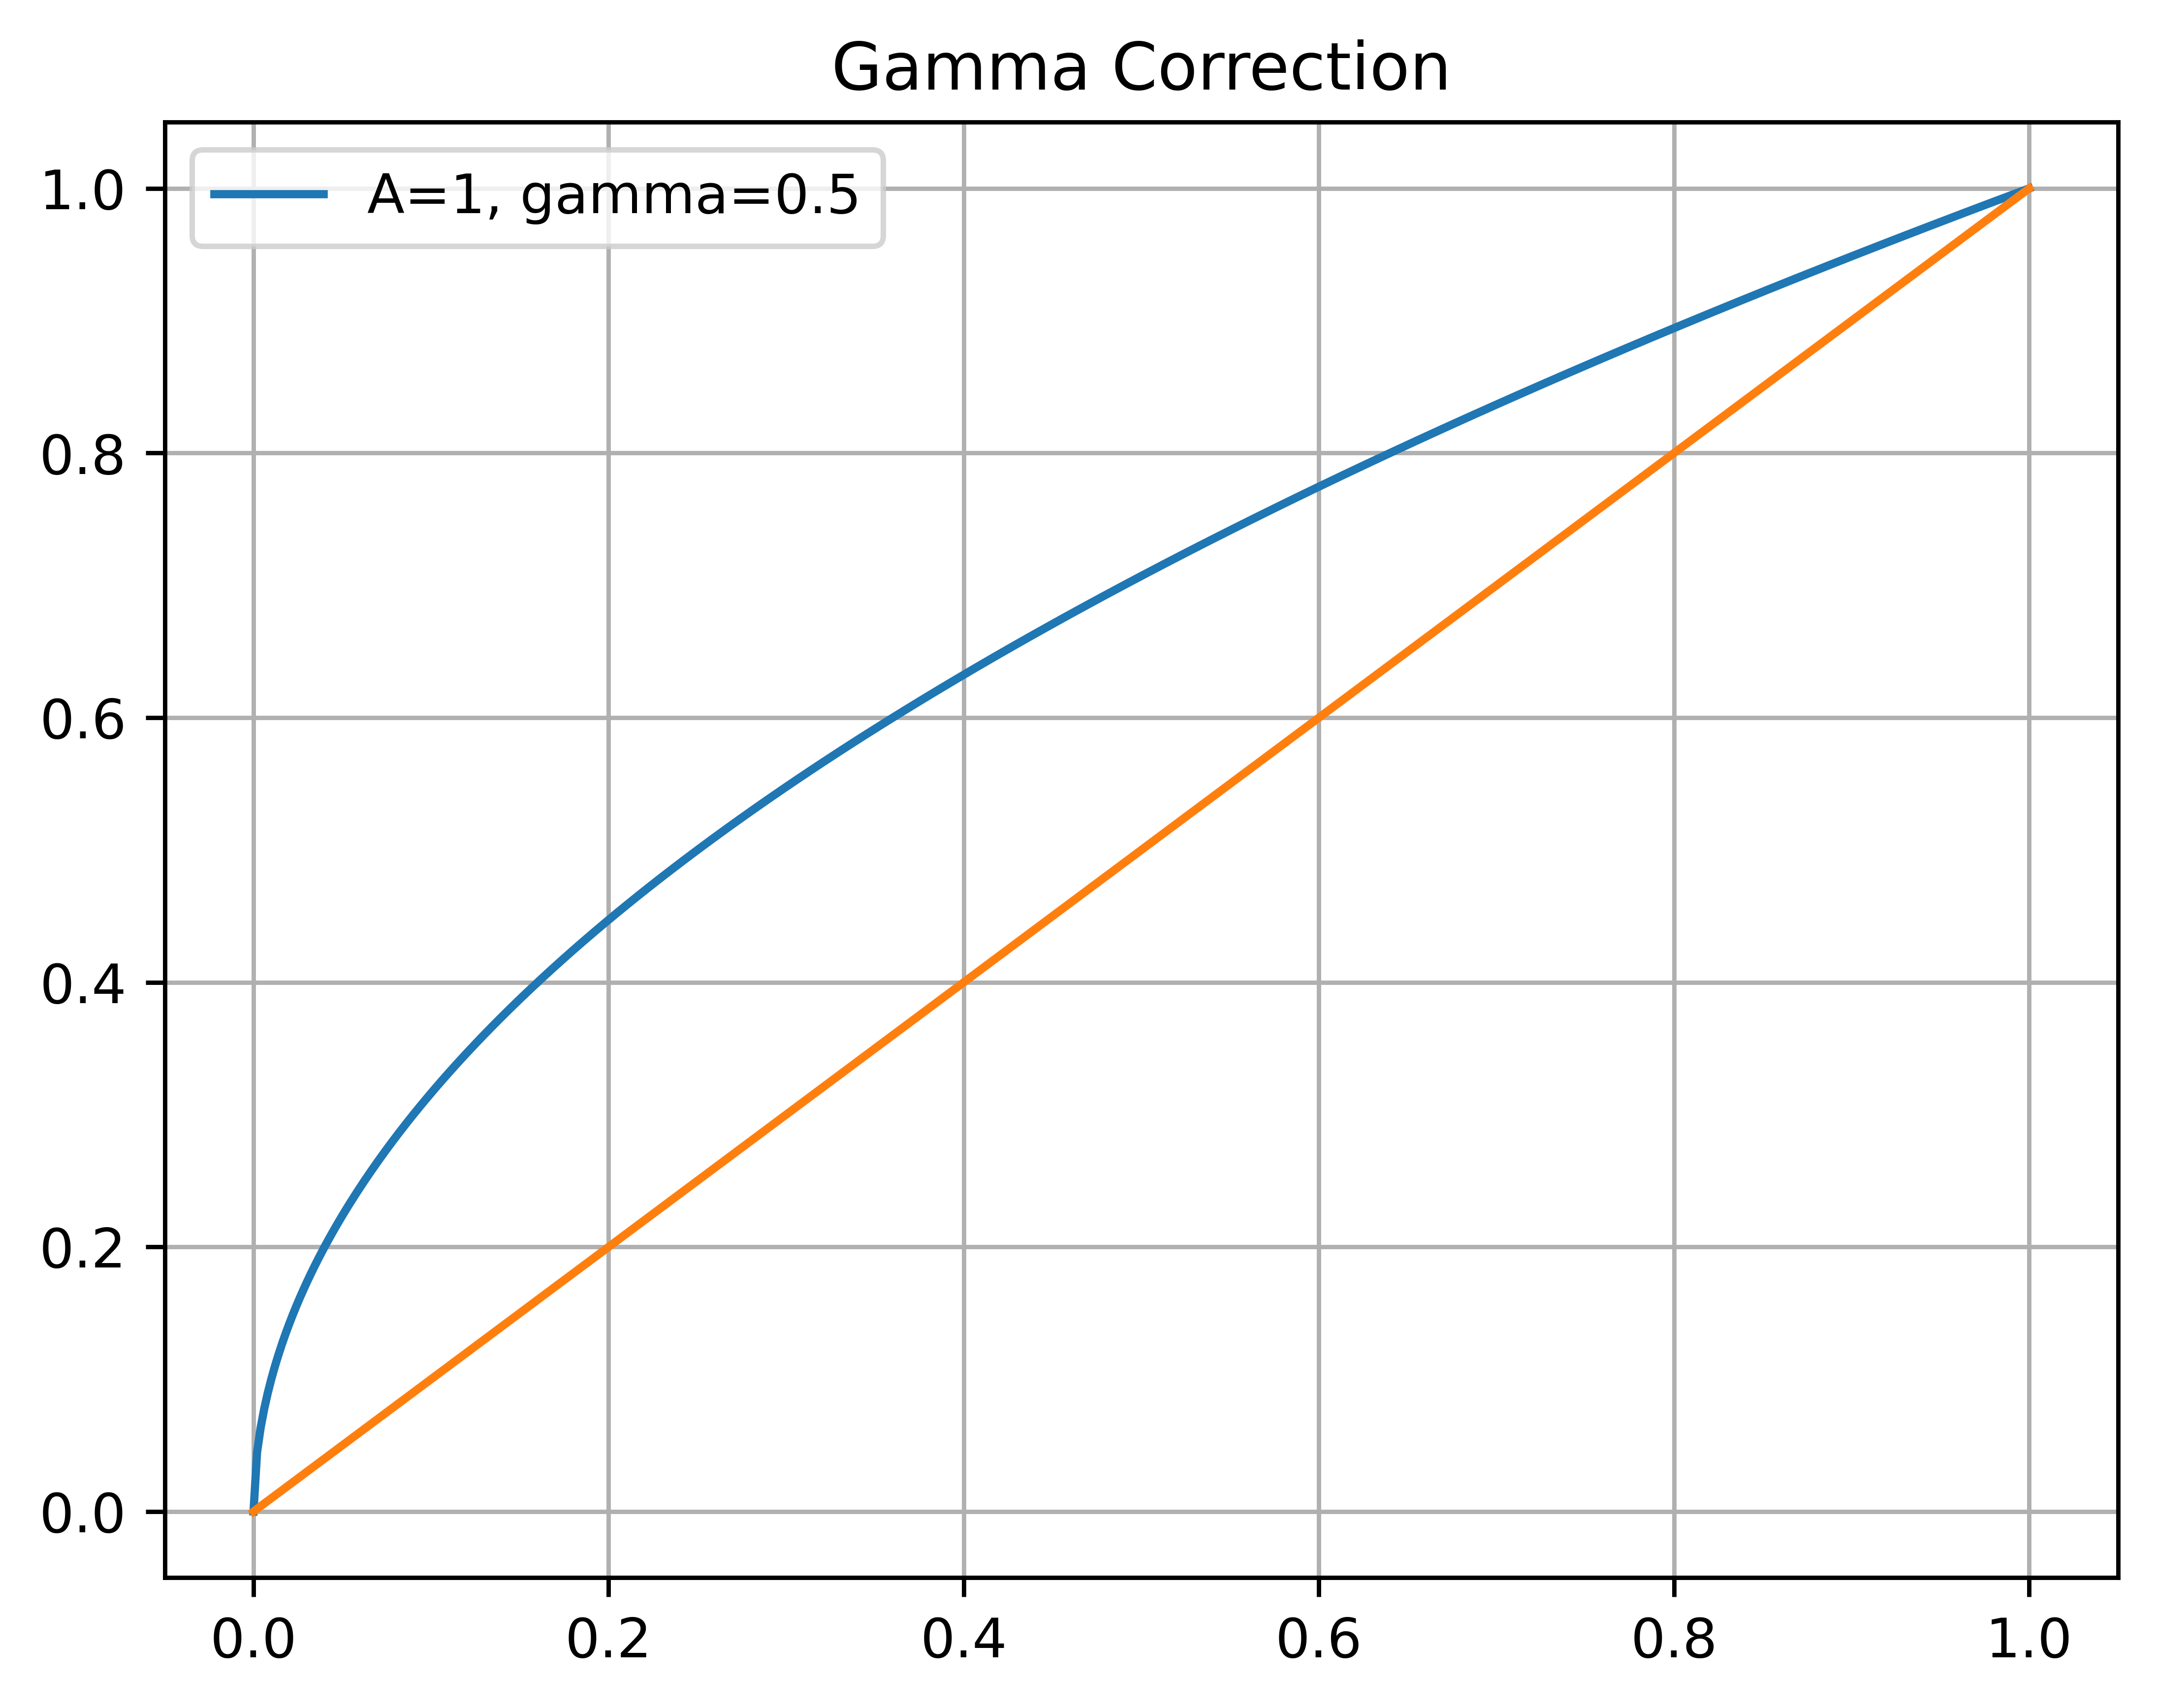

In [58]:
x = np.linspace(0,1,500)
def gammaC(x, A=1.0,g=0.5):
    return (A*x)**g
fig = plt.figure(dpi=800)
plt.plot(x, gammaC(x), label="A=1, gamma=0.5")
plt.plot(x,x)
plt.grid()
plt.legend()
plt.title("Gamma Correction")
plt.savefig(
    os.path.join("forreport","gmma_a1_05.jpg"),
    bbox_inches="tight",pad_inches=0
)

plt.show()